In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Data summary

In [25]:
restaurant_data = pd.read_csv("restaurant_data.csv")
restaurant_data.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [26]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [27]:
restaurant_data.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


### Check for missing values

In [28]:
restaurant_data.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

### Correlation matrix for predictors of interest

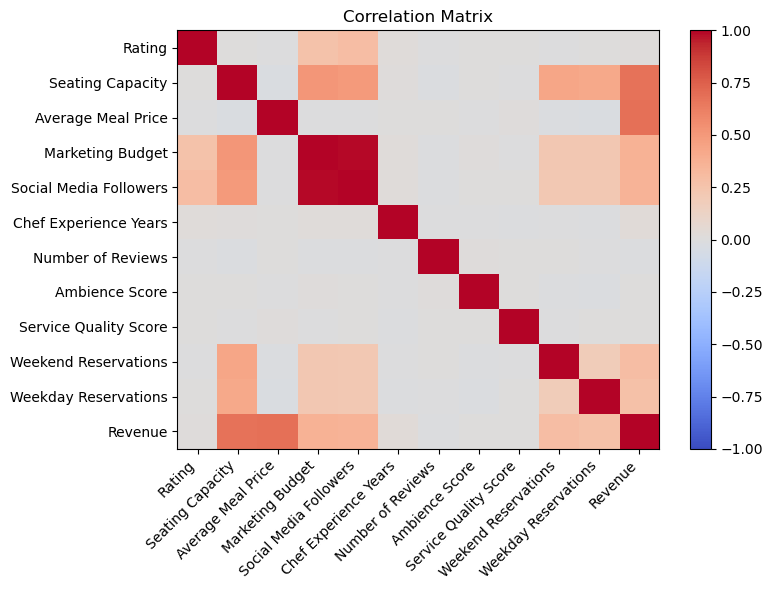

In [29]:
cols = ['Rating','Seating Capacity','Average Meal Price','Marketing Budget','Social Media Followers','Chef Experience Years',
        'Number of Reviews','Ambience Score','Service Quality Score','Weekend Reservations','Weekday Reservations','Revenue']

correlation_matrix = restaurant_data[cols].corr()
response_corr = correlation_matrix['Revenue']

plt.figure(figsize=(8, 6)) 

# Create a heatmap 
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto', vmin=-1, vmax=1)

# Add a color bar 
plt.colorbar()

# Add labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.tight_layout()
plt.show()

From the correlation matrix, I think "Seating Capacity", "Average Meal Price", "Marketing Budget", and "Weekend Reservations" would be good predictors.

### Predictor Histograms

In [30]:
df = restaurant_data[["Seating Capacity","Average Meal Price","Marketing Budget","Weekend Reservations","Revenue"]].copy()
df = df.rename(columns={"Seating Capacity":"seating_capacity","Average Meal Price": "average_meal_price","Marketing Budget":"marketing_budget","Weekend Reservations":"weekend_reservations","Revenue":"revenue"})

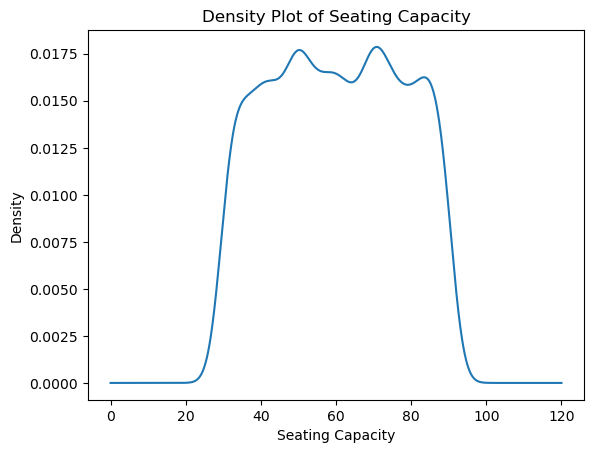

In [31]:
df['seating_capacity'].plot(kind='kde')
plt.title('Density Plot of Seating Capacity')
plt.xlabel('Seating Capacity')
plt.show()

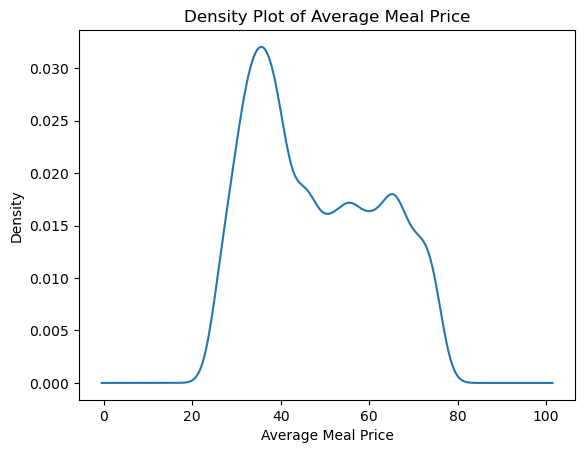

In [32]:
df['average_meal_price'].plot(kind='kde')
plt.title('Density Plot of Average Meal Price')
plt.xlabel('Average Meal Price')
plt.show()

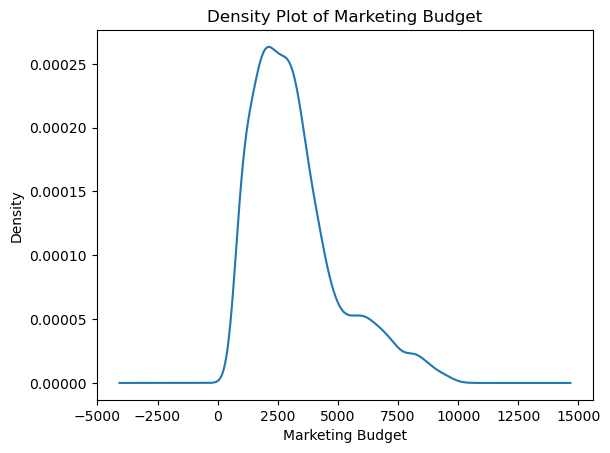

In [33]:
df['marketing_budget'].plot(kind='kde')
plt.title('Density Plot of Marketing Budget')
plt.xlabel('Marketing Budget')
plt.show()

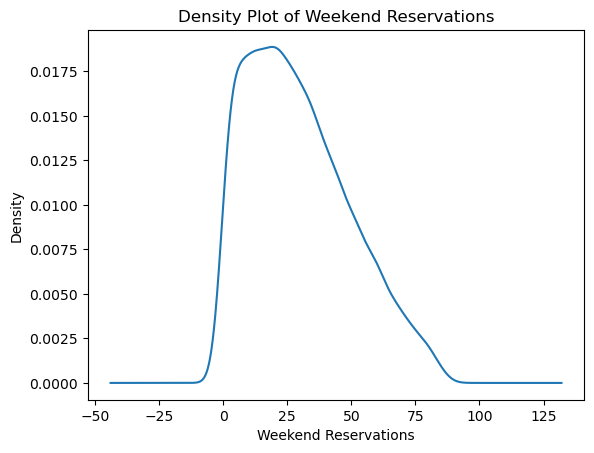

In [34]:
df['weekend_reservations'].plot(kind='kde')
plt.title('Density Plot of Weekend Reservations')
plt.xlabel('Weekend Reservations')
plt.show()

### Fitting Model

In [35]:
model = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget+weekend_reservations', data=df).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 4.723e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:40:55   Log-Likelihood:            -1.0322e+05
No. Observations:                8368   AIC:                         2.064e+05
Df Residuals:                    8363   BIC:                         2.065e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.205e+05   2999.869   -206.852      0.000   -6.26e+05   -6.15e+05
seating_capacity       1.06e+04     43.587    243.273      0.000    1.05e+04    1.07e+04
average_meal_price    1.317e+04     42.018    313.523      0.000    1.31e+04    1.33e+04
marketing_budget         2.2310      0.383      5.818      0.000       1.479       2.983
weekend_reservations    -0.7170     33.434     -0.021      0.983     -66.257      64.823
==============================================================================
Omnibus:                       27.915   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.739
Skew:                           0.007   Prob(JB):                     1.05e-08
Kurtosis:                       3.324   Cond. No.                     1.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Type 1 Anova

In [37]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
seating_capacity,1.0,2.744868e+14,2.744868e+14,90500.613903,0.000000e+00
average_meal_price,1.0,2.983708e+14,2.983708e+14,98375.366263,0.000000e+00
marketing_budget,1.0,1.026524e+11,1.026524e+11,33.845352,6.186784e-09
weekend_reservations,1.0,1.394683e+06,1.394683e+06,0.000460,9.828921e-01
Residual,8363.0,2.536483e+13,3.032983e+09,NaN,NaN


In [38]:
model2 = smf.ols('revenue~seating_capacity+average_meal_price+marketing_budget', data=df).fit()
sm.stats.anova_lm(model2, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
seating_capacity,1.0,2.744868e+14,2.744868e+14,90511.430475,0.000000e+00
average_meal_price,1.0,2.983708e+14,2.983708e+14,98387.124021,0.000000e+00
marketing_budget,1.0,1.026524e+11,1.026524e+11,33.849398,6.173959e-09
Residual,8364.0,2.536484e+13,3.032620e+09,NaN,NaN


In [39]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
seating_capacity,1.794969e+14,1.0,59181.646622,0.000000e+00
average_meal_price,2.981326e+14,1.0,98296.829238,0.000000e+00
marketing_budget,1.026537e+11,1.0,33.845807,6.185346e-09
weekend_reservations,1.394683e+06,1.0,0.000460,9.828921e-01
Residual,2.536483e+13,8363.0,NaN,NaN


Adding Weekend Reservations does not improve the model significantly, but the other three predictors do.